# Decision Tree em Python

In [ ]:
!pip install graphviz # Visualizar o Grafo (Decision Tree é Grafo Computacional)

In [ ]:
#importando módulos

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import pydot
import graphviz


In [ ]:
# Criando dataset

instancias = [
      {'Curado': False, 'Cloroquina': 'sim'},
      {'Curado': True, 'Cloroquina': 'nao'},
      {'Curado': True, 'Cloroquina': 'nao'},
      {'Curado': True, 'Cloroquina': 'nao'},
      {'Curado': False, 'Cloroquina': 'nao'},
      {'Curado': True, 'Cloroquina': 'nao'},
      {'Curado': True, 'Cloroquina': 'nao'},
      {'Curado': False, 'Cloroquina': 'sim'},
      {'Curado': True, 'Cloroquina': 'nao'},
      {'Curado': False, 'Cloroquina': 'sim'},
      {'Curado': False, 'Cloroquina': 'sim'},
      {'Curado': False, 'Cloroquina': 'nao'},
      {'Curado': True, 'Cloroquina': 'nao'},
      {'Curado': True, 'Cloroquina': 'sim'}

]

In [ ]:
# Transformando o Dicionário em DataFrame

df = pd.DataFrame(instancias)

In [ ]:
df

,Curado,Cloroquina
0,False,sim
1,True,nao
2,True,nao
3,True,nao
4,False,nao
5,True,nao
6,True,nao
7,False,sim
8,True,nao
9,False,sim


In [ ]:
# Preparando os dados para treino
# Transformando Variáveis

X_train = [[1] if a else [0] for a in df['Curado']]
y_train = [1 if d == 'sim' else 0 for d in df['Cloroquina']]
labels = ['Cloroquina']

In [ ]:
print (X_train)

[[0], [1], [1], [1], [0], [1], [1], [0], [1], [0], [0], [0], [1], [1]]


In [ ]:
print (y_train)

[1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1]


In [ ]:
# Construindo o Classificador Baseado em Entropia (Ganho de Informação)

modelo_v1 = DecisionTreeClassifier(max_depth = None,
                                   max_features = None,
                                   criterion = 'entropy',
                                   min_samples_leaf = 1,
                                   min_samples_split = 2
                                   )

In [ ]:
# Apresentando os dados ao Classificador

modelo_v1.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# Definindo o nome do arquivo com a árvore de decisão

arquivo = '/content/sample_data/tree_modelo_v1.dot'

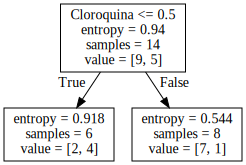

In [ ]:
# Gerando o gráfico da árvore de decisão

export_graphviz(modelo_v1, out_file= arquivo, feature_names= labels)
with open(arquivo) as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

O agrupamento com 9 e 5 foi o que apresentou MELHOR ENTROPIA, portanto maior ganho de informação. Portanto ele fica no TOPO da hierarquia da Decision Tree. Isso é exatamente o que o algoritmo faz: Ele percorre os exemplos de dados, faz o cálculo da entropia, e então faz a melhor combinação... o atributo que tem melhor entropia  vai para o TOPO... Então ele vai criando os níveis da Árvore...